## My First Decision Tree

In [2]:
import os
os.environ["PATH"] += os.pathsep + '/Users/raghavsharma/anaconda3/envs/python_env/lib/python3.12/site-packages/graphviz/'

In [3]:
import graphviz
from sklearn import tree

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
tree_clf,
out_file=None,
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True, 
special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", view=True)

### Exercise 7 of the Book - Hands on Machine Learning 

Train and fine-tune a Decision Tree for the moons dataset by following these
steps:\  
a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.\  
b. Use train_test_split() to split the dataset into a training set and a test set.   
c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.\ 
d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [8]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(8000, 2)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 10, 100]}

tree = DecisionTreeClassifier(random_state=42)

grid_search= GridSearchCV(tree, params, verbose=1, cv=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 10, 100]},
             verbose=1)

In [12]:
best_tree = grid_search.best_estimator_

In [13]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)

In [14]:
y_pred = best_tree.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8735

In [16]:
best_tree

DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)

In [17]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
best_tree,
out_file=None,
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True, 
special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", view=True)

'iris_decision_tree.pdf'

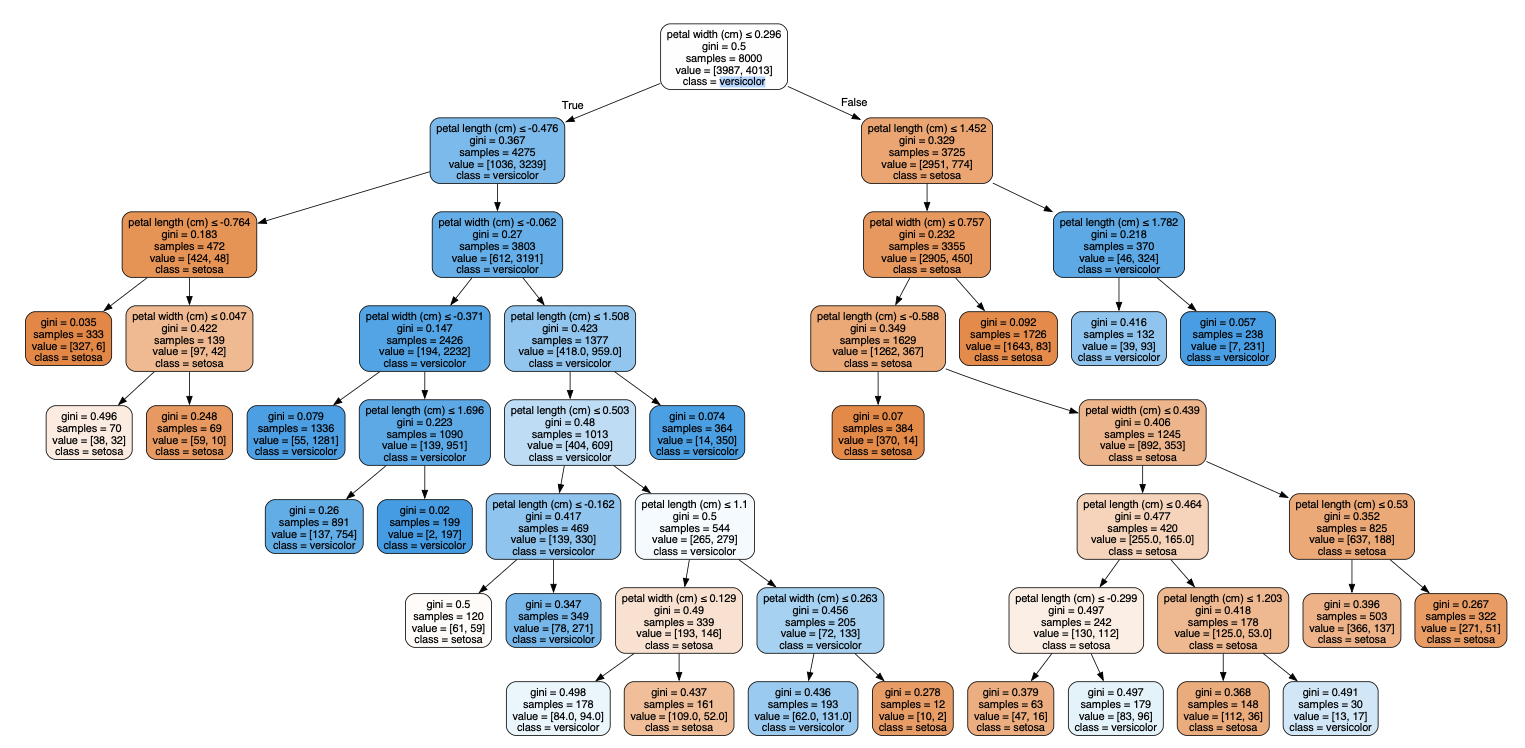